In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [70]:
df = pd.read_csv(r'/Users/veyselaytekin/Desktop/byte/exercises/machine_learning/datasets/transfusion.data.csv')

target_col = 'whether he/she donated blood in March 2007'

print(f"df shape : {df.shape}")
df.head()

df shape : (748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [71]:
# Recency (months): en son bagis yaptigindan bugune gecen süre
# Frequency (times): kac kere bagis yaptigi
# Monetary (c.c. blood) (Miktar - c.c. Kan): toplamda ne kadar kan bagisi yaptigi
# Time (months) (Süre - Aylar): kisinin ilk kan bagisindan bugune gecen süre 

In [72]:
new_names = {
    'whether he/she donated blood in March 2007' : 'March Blood Donate'
}
df = df.rename(columns=new_names)
df.head()
# target sütun adini degistiriyoruz

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   March Blood Donate     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [74]:
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()  # exclude object ve category'i haric tut anlamina geliyor geriye numerical kaliyor
cat_cols = df.select_dtypes(include=['category']).columns.tolist()            # categorical türleri alir

# tolist bu sonuclari bir liste haline getiriyor

In [75]:
num_cols

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)',
 'March Blood Donate']

In [76]:
cat_cols

[]

In [77]:
#  Örneğin, sayısal veriler doğrudan modellemeye dahil edilebilirken,
#  kategorik veriler genellikle one-hot encoding, label encoding yada get_dummies gibi yöntemlerle sayısallaştırılır.

In [78]:
# Total summary

def set_frame_style(df, caption = ""): 
    """Helper function to set dataframe presentation style."""
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
        'selector': 'caption', # selector , yani seciyor. bunun basliga uygulanacagini seciyor
        'props': [
            ('color', 'Blue'),
            ('front-size', '18px'),
            ('font-weight', 'bold')
        ]}])
# caption baslik bölümü asagida fonksiyon cagrilirken oraya istenilen deger girilir
# pandas'in sytle bölümüne erisip ordan degisiklikleri yapmak icin kullnailiyor
# fareyi üstüne getirince mavi yapiyor

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(), f'{title}: First 5 Rows of Data'))
    display(set_frame_style(data[cols].describe().T, f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Count in Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}: Columns With NaN'))

check_data(df, 'Train data')
print('-'*100)

# büyük degerleri mavi ile gösteriyor
# ama github ta normal gözüküyor sadece üzerine gelince mavi yapiyor.
# belkide onuda yapmiyor githubin özelligi olabilir tam denemedim

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


,count,mean,std,min,25%,50%,75%,max
Recency (months),748.000000,9.506684,8.095396,0.000000,2.750000,7.000000,14.000000,74.000000
Frequency (times),748.000000,5.514706,5.839307,1.000000,2.000000,4.000000,7.000000,50.000000
Monetary (c.c. blood),748.000000,1378.676471,1459.826781,250.000000,500.000000,1000.000000,1750.000000,12500.000000
Time (months),748.000000,34.282086,24.376714,2.000000,16.000000,28.000000,50.000000,98.000000
March Blood Donate,748.000000,0.237968,0.426124,0.000000,0.000000,0.000000,0.000000,1.000000


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
Unique Value Count,31,33,33,78,2


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [79]:
class CFG:
    """
    Purpose of the Class:
    - Transforming the feature engineering stage into an open-close format to reduce bugs
    - Expand/demonstrate the scope of tested features in the final solution, even if some features are not present.
    """
    
    target_col = 'March Blood Donate'
    
    pass    #burda yer tutucu olarak görev aliyor icerigi ve islevi tam ayarlanmamis yapilarin
            # bir nevi calisir durumda kalmasi icin kullanilir


# CFG : bu sabit degerleri belli bir yerde tutmak icin olusturulan bir class yapisidir

# Train | Test Split

In [80]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=34, stratify=df[CFG.target_col])

# burda da cok original birsey var. sadece datayi böldü 
# target degiskenini ayri olarak ele almadi
# nedenini bilmiyorum ama suan bölünmüs datada target sütunuda var yani =March Blood Donate
# neden target'i ayirmadigini anladim asagida görsellestirme yapacak
# simdilik fit islemi icin kullanmayacak zaten random_state=34 ile istedigi zaman ayirabilir

# normalde train_test_split(X, y  yaziyorduk demekki her birini ikiye bölüyordu ve toplamda eskiden 4 cikti veriyordu
# burda sadece df var o zaman iki tane cikti verecek

# ve stratify = normalde biz 'y' olarak ögrenmistik
# her deger icin  esit sayida degerler aliyordu ama o cok gercek hayata uygun degildi
# ama burda df[CFG.target_col] bu sekilde yaparak gercek datadaki dagilim oranina göre bir dagilim yapiyor



In [81]:
df_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
345,11,1,250,11,0
547,2,3,750,11,0
415,16,1,250,16,0
601,4,6,1500,46,0
527,2,15,3750,64,0


In [82]:
df_test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
597,4,6,1500,43,0
724,21,1,250,21,0
270,16,11,2750,40,0
2,1,16,4000,35,1
662,16,3,750,21,0


# EDA

In [83]:
for i, var_name in enumerate(df_train.columns.to_list()):
    print(i ,var_name)
# alttaki fonksiyonda kullanacagimiz icin ciktiyi görmek istedim

0 Recency (months)
1 Frequency (times)
2 Monetary (c.c. blood)
3 Time (months)
4 March Blood Donate


In [136]:
n_cols=4
n_rows = (len(df_train.columns) - 1) // n_cols + 1
n_rows
# bu asagida olan kodun ciktisini görmek icin yaptim.
# burda bütün grafikleri toplamda iki satirda gösterecegini söyluyor

2

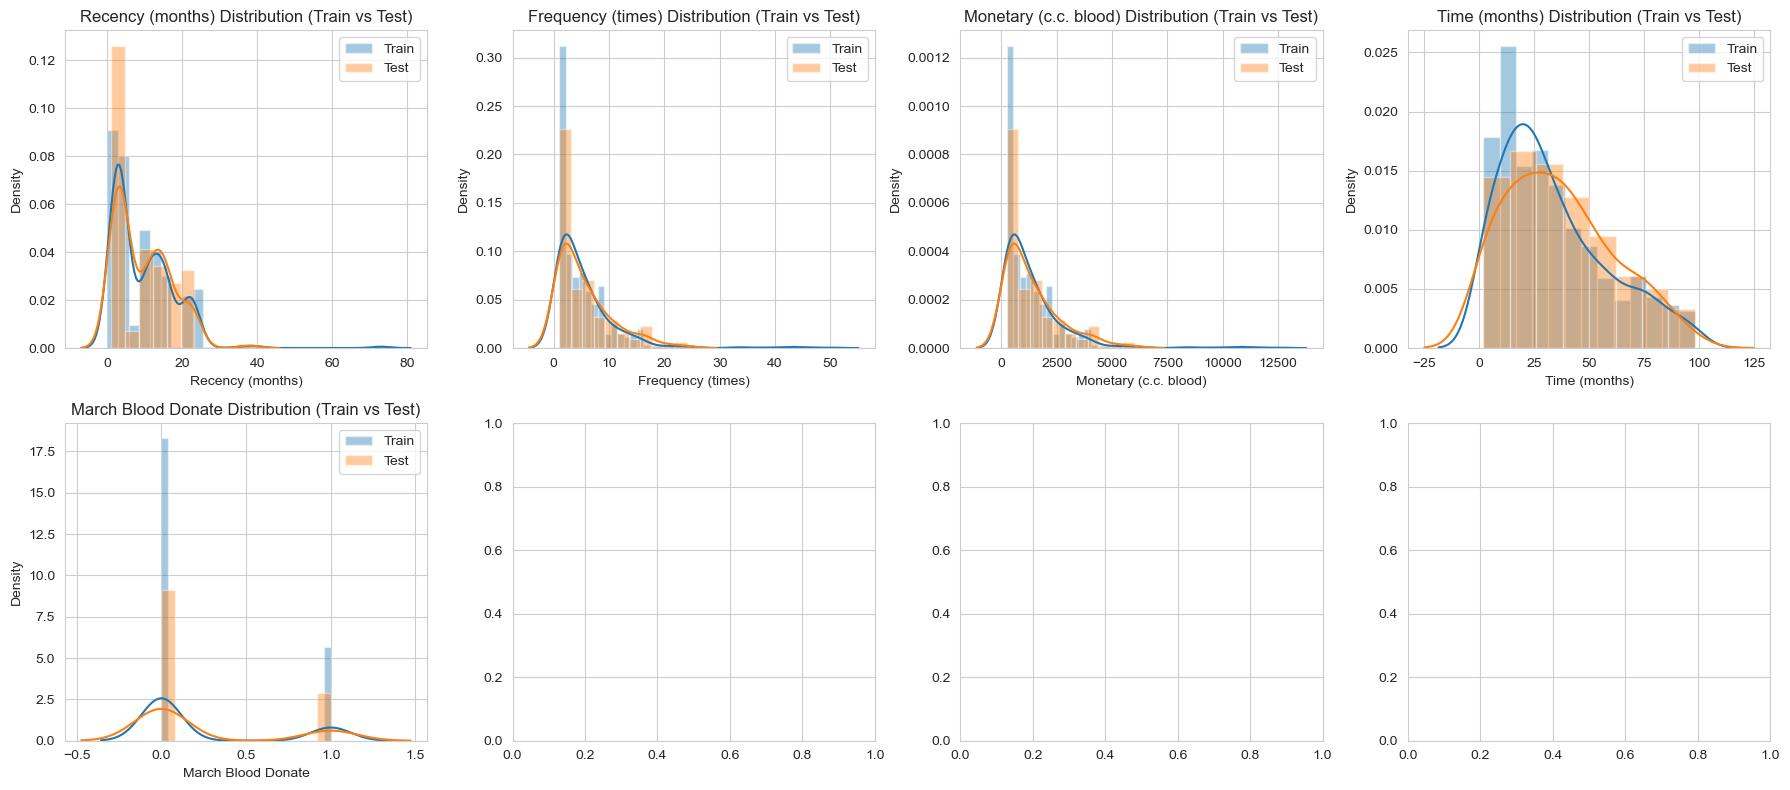

In [85]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3): # x ekseninde iki deger arsina sigdirilacak kutu sayisini gösteriyor defult= 3 ama asagida 4 verebiliyoruz
    n_rows = (len(df_train.columns) - 1) // n_cols + 1        # -1 ile target sütununu almiyor n_rows histogramlari yerlestirecegimiz satir sayisini gösteriyor. asagida toplamda 2 satir halinde gösteriyor

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows)) # n_rows bir üstte 2 oldugunu görmustuk
    axes = axes.flatten()                                                        # birden fazla satir ve sütun varsa onlari tek bir parca halinde sergiler

    for i, var_name in enumerate(df_train.columns.tolist()): # bir üstte hangi degerleri aldigi görülüyor
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:                                        # burda ikinci if icerisinde ilk yakaladigi degiskeni birakmiyor ve o eksene birde test egrisini cizdiriyor
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()    # görseller arasina uygun bosluklar birakarak düzeni optimize eder
    plt.show()            # olusan sonucu gösterir

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)


# bu modelin train ve test setlerinede nasil performans gösterecegine dair bir inference verebilir
# dagilimlari benzer olan veri setleri daha güvenilir ve tutarli sonclar verirler

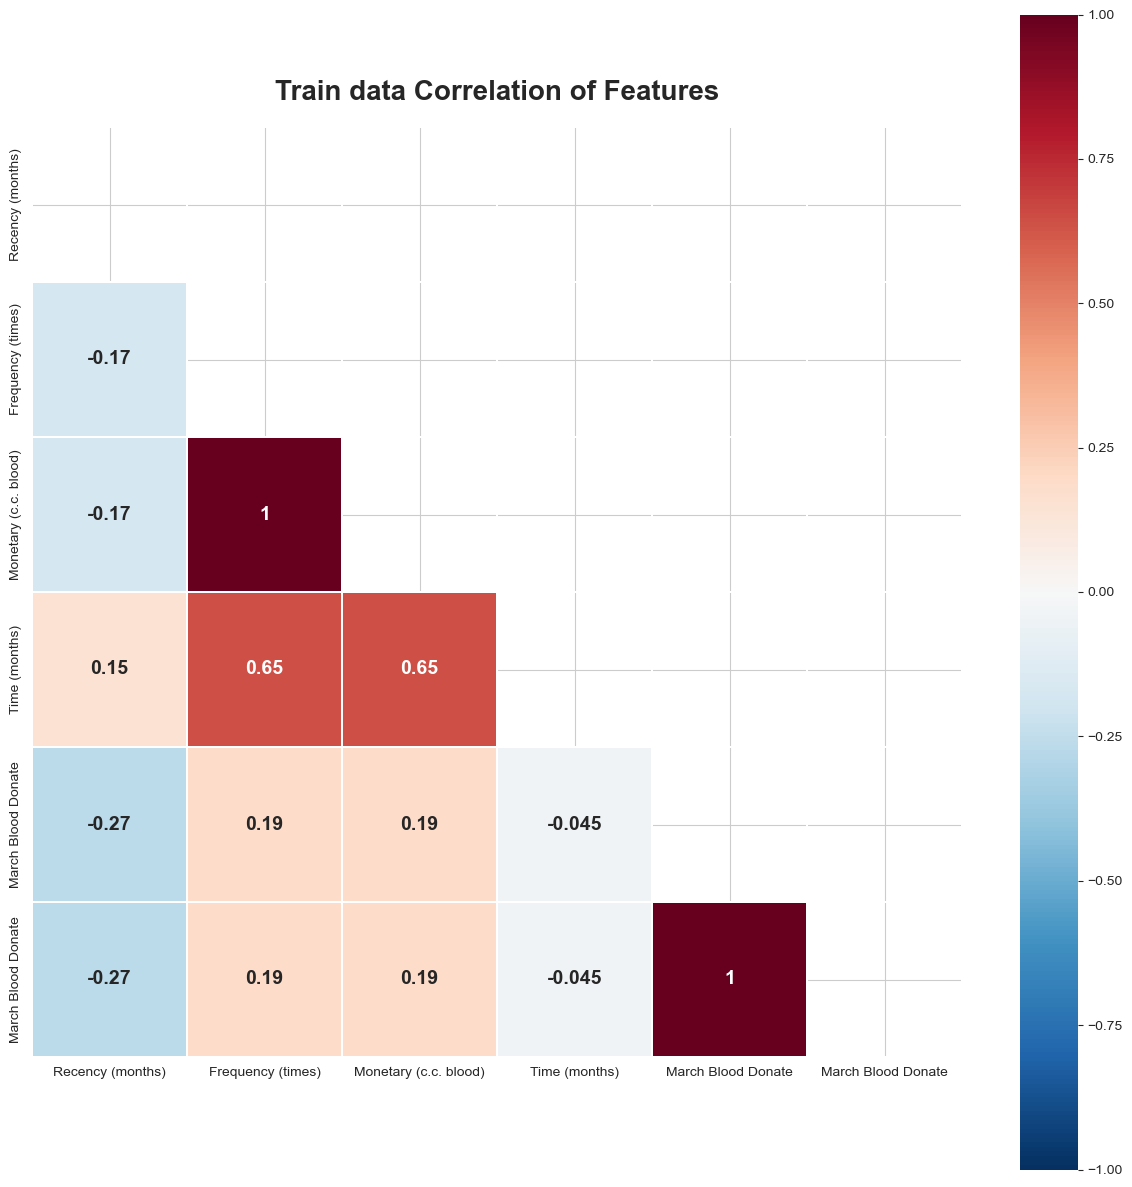

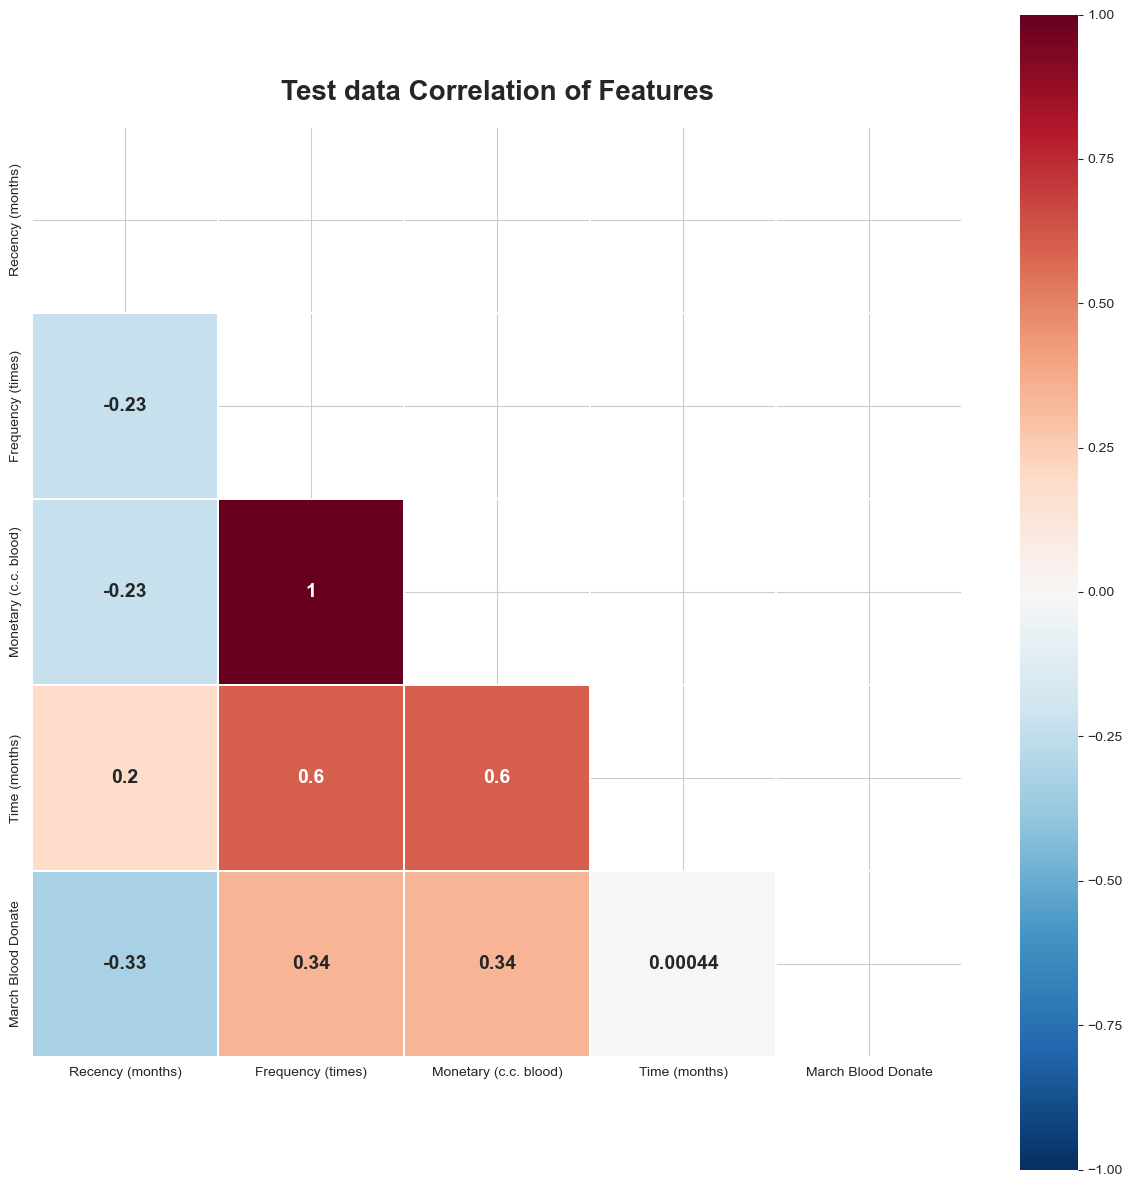

In [86]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal element
    mask = np.zeros_like(df.astype(float).corr())   # heatmap in diger yarisini gizliyor. gereksiz bilgileri siliyor
    mask[np.triu_indices_from(mask)] = True         # matrisin ortssi hep 1 oluyor bunu engellemek icin

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r                        # renk skalasinin renklerini belirliyor Red be Blau oluyor
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)    # baslik ekler

    # Plot the heatmap with the masked diagonal element
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0,
    square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 14, 'weight': 'bold'},
    mask=mask)
    # df.astype(float).corr() bu haritayi cizer geri kalanlari ise cizgi genisligi, 
    # max ve min degerleri, renk skalasini, hücrelerin kare seklinde olmasini 
    # hücre icindeki yazilarin özellikleri 
    # ve maske uygulama yani diger yarisini gösterme

plot_heatmap(df_train[num_cols+[CFG.target_col]], title='Train data') # numeric degerler ve target sütunlarla heatmap cizer
plot_heatmap(df_test[num_cols], title='Test data')

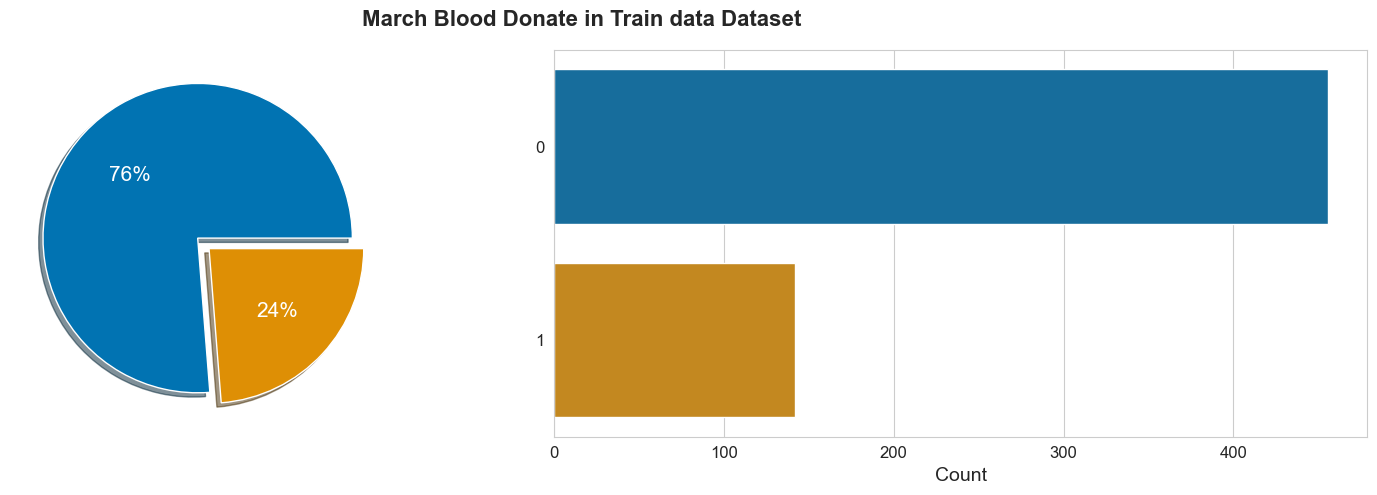

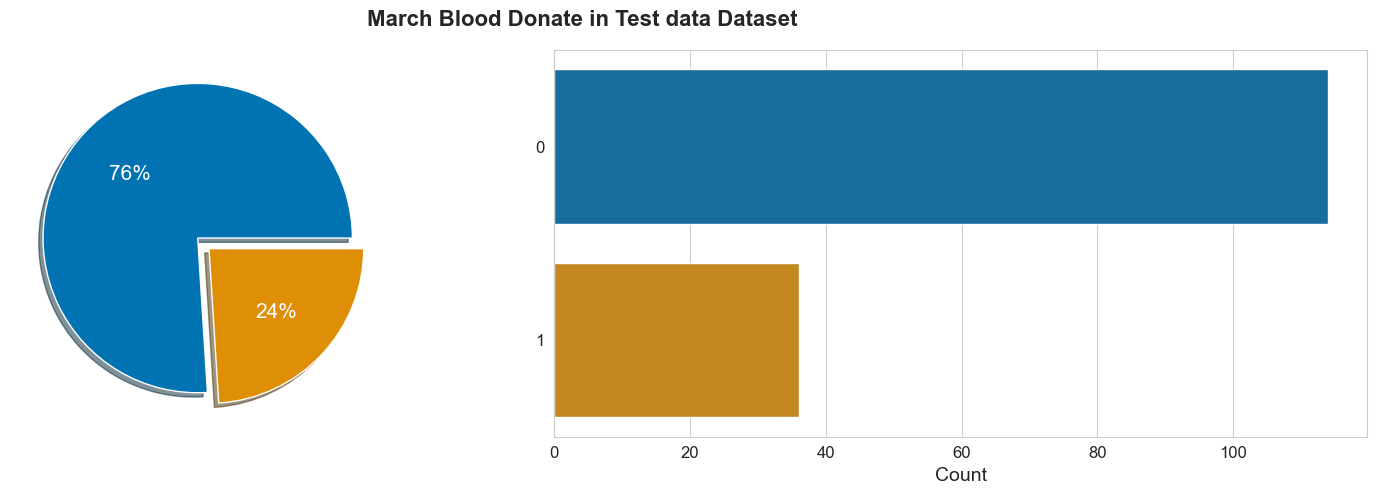

In [87]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('NaN')           # eksik degerler NaN ile doldurulur

    fig, ax = plt.subplots(1, 2, figsize=figsize)       # bu her iki grafik icin bir tek parca ortam olusturuyor ax[0] a biri ax[1] olan yere digeri gelecek
    ax = ax.flatten()                       # eksenleri düzene sokar

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct= '%1.f%%',                  # her dilimi n yüzde olarak degerini verir
        textprops={'size': 15, 'color': 'white'},
        colors = pie_colors                 # pasta dilimlerinin renklerii belirler
    )

    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )

    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines from y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold') # baslik ekler
    plt.tight_layout()              # göreseller düzenler
    plt.show()

plot_target_feature(df_train, CFG.target_col, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, CFG.target_col, figsize=(16,5), palette='colorblind', name='Test data')

In [88]:
n_rows = (len(CFG.target_col) - 1) // n_cols + 1
n_rows

5

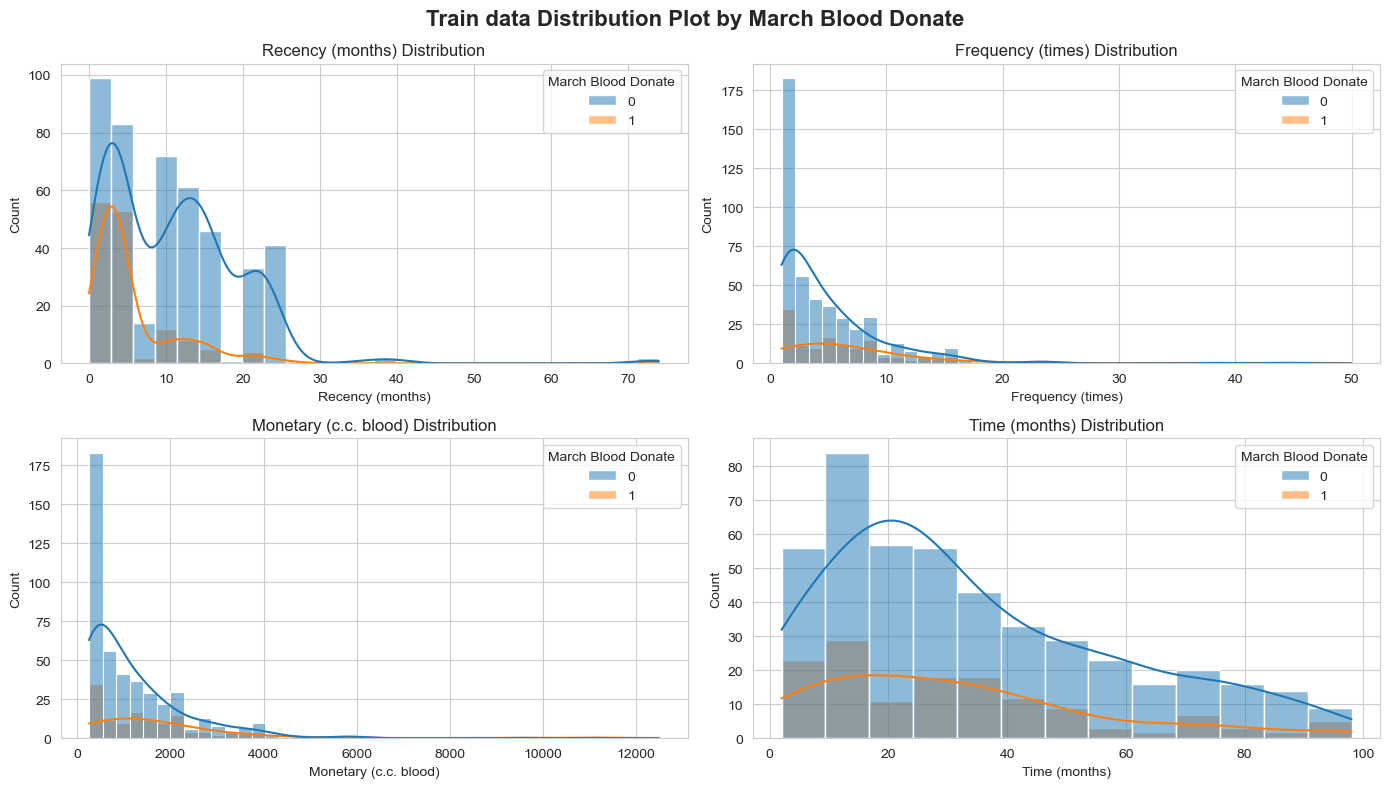

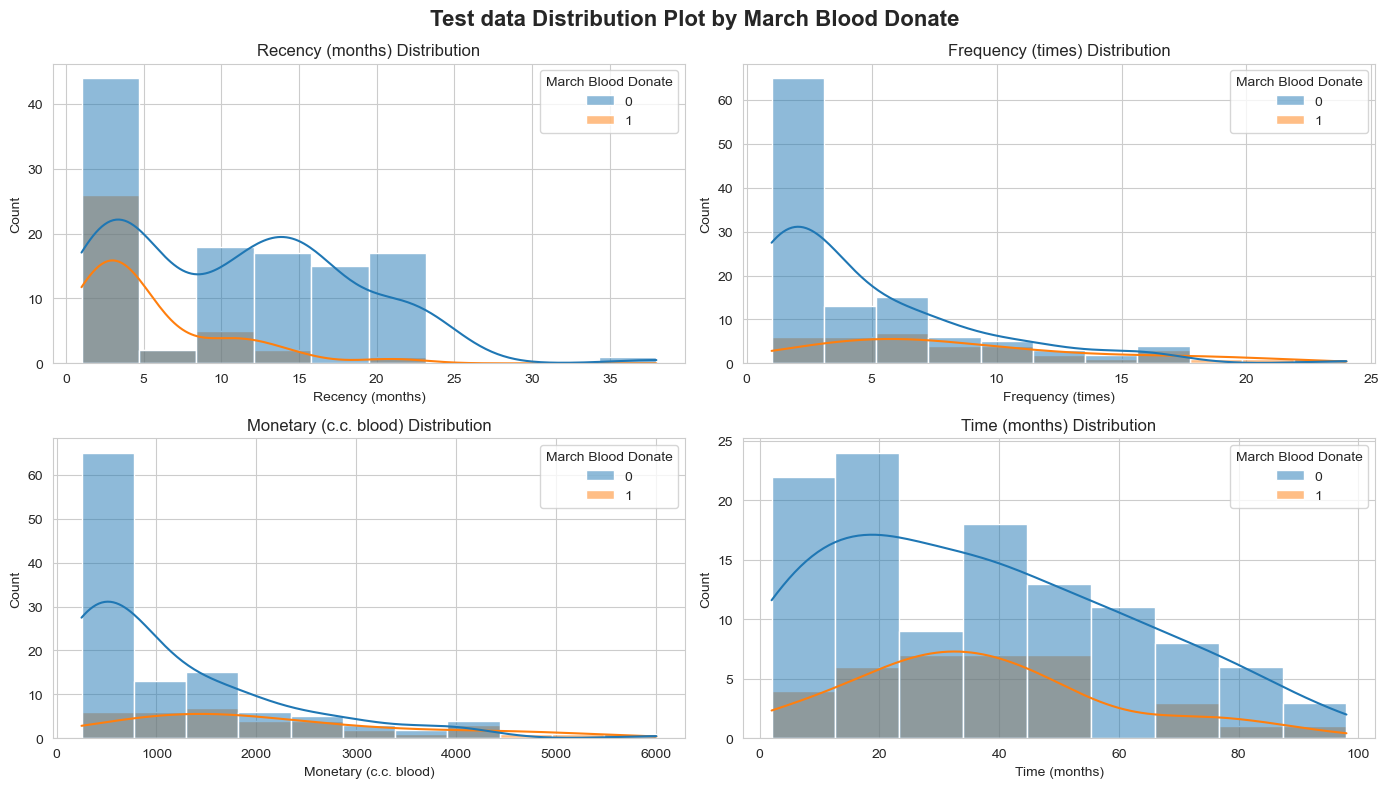

In [89]:
def plot_distribution(df, hue, title='', drop_cols=[]):    # renklendirme degiskeni , drop_cols=[] görsellestirilmek istenmeyen sütun
    sns.set_style('whitegrid')                             # arka planda izgaralar koyar

    cols = df.columns.drop([hue] + drop_cols)              # hue yani aslinda targer_col drop ediliyor ama burayi anlamadim
    n_cols = 2                                             # her satirda gösterilecek grafik sayisi
    n_rows = (len(cols) - 1) // n_cols + 1                 # grafikleri kac satirda yerlestirecegini hesaplar

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))    # Grafiklerin çizileceği figür ve eksenler (axes) oluşturulur.

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i% n_cols

        ax = axes[row, col]                                 # hangi grafign nereye gidecegini hesaplar
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue)   # hue degiskenine göre renklendirme yapar
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)  # en genel baslik
    plt.tight_layout()                                      # grafikler arasi bosluk otomatik olarak ayarlanir
    plt.show()

plot_distribution(df_train, hue=CFG.target_col, title='Train data')
    
plot_distribution(df_test, hue=CFG.target_col, title='Test data')

In [90]:
# verilerin dagilimlarini incelemek, veri setindeki egilimleri ve anormalikleri tespit etmeye yardimci olur
# outliers lar ve skewness ler modelin dogrulugunu etkileyebilir

# özelliklerin dagilimi normalizasyon, scaling ve encoder islemleri konusunda bize fikir verir

# features arasi iliskiyi incelemek ve target ile olan iliskisine bakmak hangi featuren
# target üzerinde ne kadar etkili oldugu konusunda bize fikir verir

# birbiriyle yüksek korelasyonlu featuresler modele overfitting tehlikesi verir

# featureslerin birbiri üzerindeki etkisine bakarak bazi featureslerin silinmesini veya yeni degiskenler olusturma konusunda yardimci olabilir

# feature selection modelin karmasikligini complexity i azaltmak ve overfitting'i önlemek icin önemlidir

# feature engineering olan featureslerden yeni featuresler cikarma var olani silme, ikisini birlestirip yeni bir featues yaratma

# tarih sütunundan gün ay yil gibi yeni sütunlarin olusturulmasi feature engineeringe girer

# categorik verilerin one-hot encodr label encoding , get_dummies gibi islemlerde dogrudan modele verilemeyen 
# categorik sütunlarin modele uygun hale getirlmesi feature engineering olarak ele alinabilir

# NaN verileri doldurmak, silmek ve benzeri islemler bu feture engineering alanina girer
# aslinda features ile yapilan islemler bir nevi EDA calismalari feature engineering denebilir

# iyi hazirlamis data basit modellerde bile yüksek performans almamiza yardimci olabilir

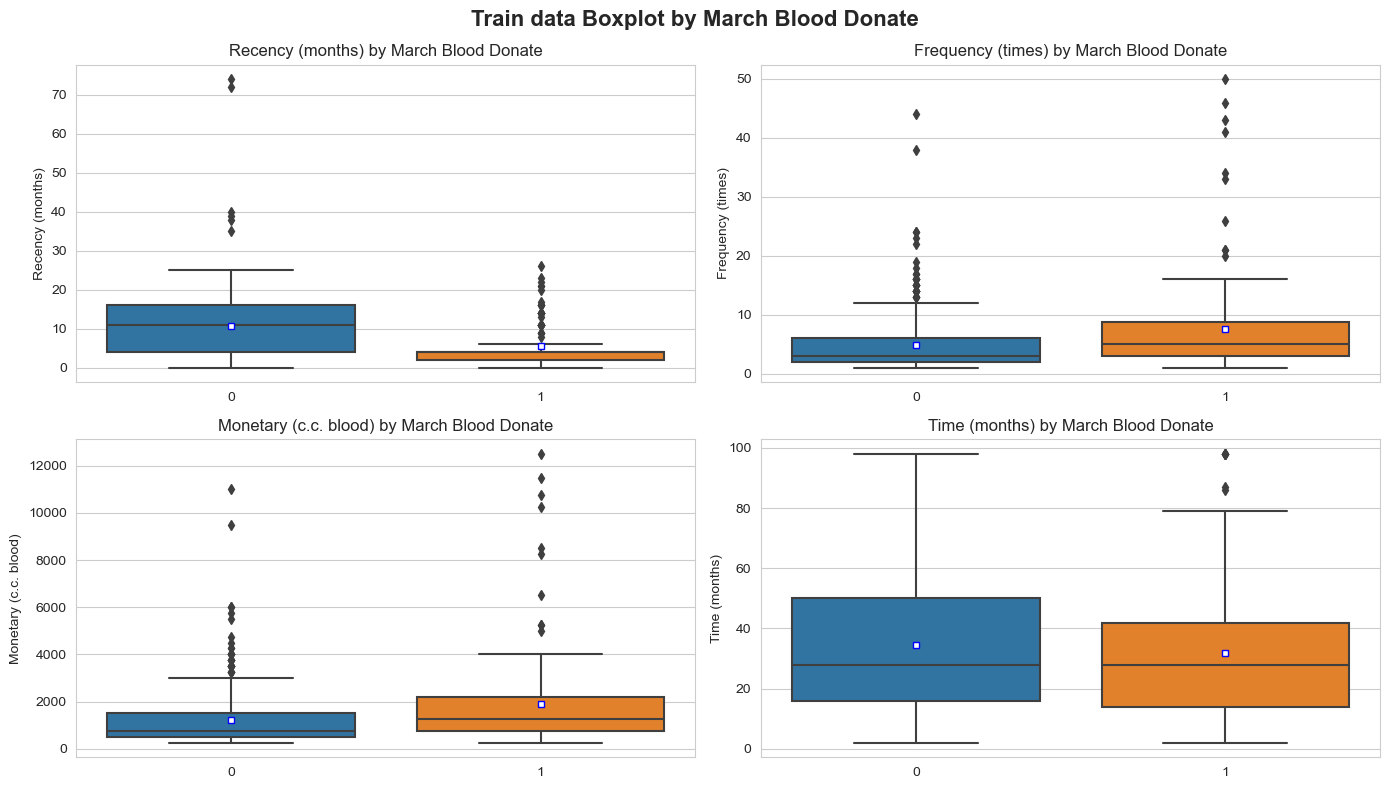

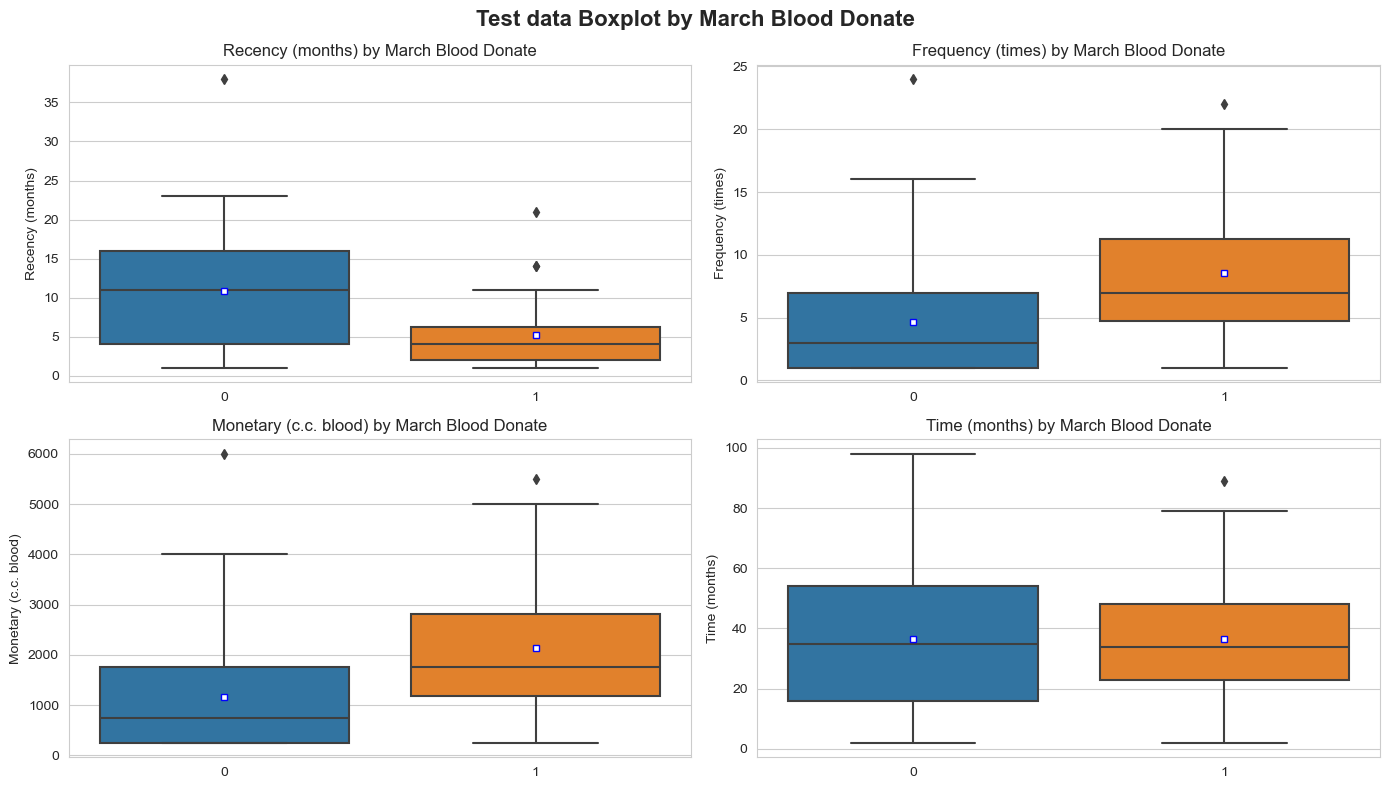

In [91]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]  # numerical sütunlar aliniyor
    n_rows = (len(num_cols) - 1) // n_cols + 1               # grafiklerin serpilecegi satir sayilari hesaplaniyor

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))  # ana ortak figure

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True,  # ortalama deger grafikte gösteriliyor
        meanprops={'marker':'s', 'markerfacecolor':'white', 'markeredgecolor':'blue', 
        'markersize':'5'})

        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight = 'bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=CFG.target_col, title='Train data', n_cols=2)
plot_boxplot(df_test, hue=CFG.target_col, title='Test data', n_cols=2)

# burda her bir features'in target ile olan iliskisini inceliyoruz
# x ekseni icince 0 ve 1 degerleri var. onlarin ne kadar aralikta olduguna bakiyoruz

In [92]:
# aslinda kutunun her bir bölümünde verinin yaklasik %25 var diyebiliriz
# kutu icindeki cizgi median degerini gösterir. bu veri setinin egilime hakkinda bilgi verir
# o biyik tarafinda kalan degerler outlier olarak degerlendirilmez. en disarida kalan degerleri öyle degerlendirebiliriz

# median degeri veri setinin egilimini gösterirken, kutunun büyüklügü veri setinin ne kdar yayildigini gösterir
# kisa bir kutu verilerin sikisik bir seklde dagildigini gösterir
# uzun kutuda veriler fazla yayildigi icin, varyans var diyebiliriz

# aykiri degerler incelenmelidir bunlar istatistik degerleri ortalama , median, standart sapma gibi degerleri etkileyip
# yaniltici sonuclara yol acabilir

# ve bu aykiriliklar modelin patern yakalamasini zorlastirabilir ve düsük accuracy sonuclarina neden olabilr

# Interquantil range verilerin %50 sini temsil eder

In [93]:
# aykiri degerler ya kaldirilabilir veya diger degerlerle degistirilebilir mesela median gibi

# Z SCORE:
# bunu bir örnekle aciklayayim
# örnegin 30 kisilik bir sinifimiz var 
# businifin matematik sinavindan sonra z scoreunu hesaplamak istersek
# önce bu sinavin ortalamasini buluruz. sonra bu sinifin standart sapmasini buluruz
# bu bilgilerle her bir ögrencinin Z scorunu bulabiliriz
# X ögrencinin aldigi Pun olsun X = 85
# sinifin sinav ortalamasi 75 olsun
# ve bu sinifin standart sapmasi 10 olsun
# notu 85 olan ögrenci icin Z score bulurken 
# (85-75)/10 ile Z scoru bulabiliyoruz
# cevap 1 cikar
# bu sunu gösterir ögrenci sinif ortalamasinin 1 standart sapma degerinde yuksek almistir
# bu 1 su anlama geliyor standar sapma 10 oldugu icin. bu ögrencinin 
# sinif ortalamasindan 10 puan fazla aldigini anlayabiliriz


# bu farkli veri kümelerinde olan degerleri karsilastirmak icin kullanilir
# örnedin iki farkli okulda okuyan ögrencilerin mate sinavindan aldiklari
# notlara göre kiyaslama yaparken
# direkt aldiklari notlara bakmak dogru sonuclar vermeyebilir
# sinif ortalamasi veya sinif icindeki ögrencilerin durumu, sinavin zorlugu gibi 
# degiskenler sonucu etkileyebilir
# burda Ahmet ve Mehmetin basarilarini kiyaslamak istersek Ahmet ve Mehmet icin ayri ayri
# Z scorunu bulabiliriz. bu scorlara göre bu ögrencilerin sinif
# ortalamasindan ne kadar uzakta olduklarini görebiliriz


# z score 0 ise deger ortalamaya esittr
# Z score pozitif ise deger ortalamadan büyüktür
# Z score negatif ise deger ortalamadan kücüktür

# Z scoru +2 olan bir deger ortalamadan 2 standart sapma uzakta anlamina geliyor
# Z score -3 ve +3 arasinda olmayan degerler aykiri deger olarak adlandirlir

In [94]:
# Z scoru farkli ölceklere sahip verileri karsilastirabilmek icin kullaniriz
# örnegin farkli testlerden elde edilen sonuclari degerlendirmek icin

# Anomali tespitinde kullanilirz. beklenmedik olaylari belirlemede
# burda belirleninen bir threshould degerinin üstünde olanlar anomalidir diyebiliriz
# ama burda veri dagiliminin Gauss yani normal dagilimda oldugu varsayilir. bunlari yapmak icin
# +-2 olanlar %95 güven araliginda 
# +-3 olanlar %99.7 güven araliginda oldugu söylenebilir

# Güven araligi(confidence interval) su sekilde hesaplanir
# aldigimiz ver kümesinin ortalamasi 50 olsun. ve standart sapma 5 olsun
# 50 + (1.96x5) = bu parantez icindeki deger arti ve eksi olarak eklenir
# yani 40.2 ile 59.8 arasinda verilen %95 i bulunur diyebiliriz

# Z score veri setinin normal dagilima yakin oldugu durumlarda anlamlidir
# zeten grafigide normal grafik gibi oluyor kitaplarda

In [95]:
# bazi dönüsümler yaparak sapmalar azaltilabilir
# log dönüsümü: veriler logaritmik ölcege alinir ve büyük degerler kücülür
# büyük degerler daha fazla etkilenecegi icin, aradaki ucurumlar kapanir

# karekök dönüsümü ile degerler kücültülebilr
# bu dönüsümler pozitif degerler üzerinde yapilir eger negatif degerler varsa, sabit degerler eklenierek
# pozitif hale getirilir

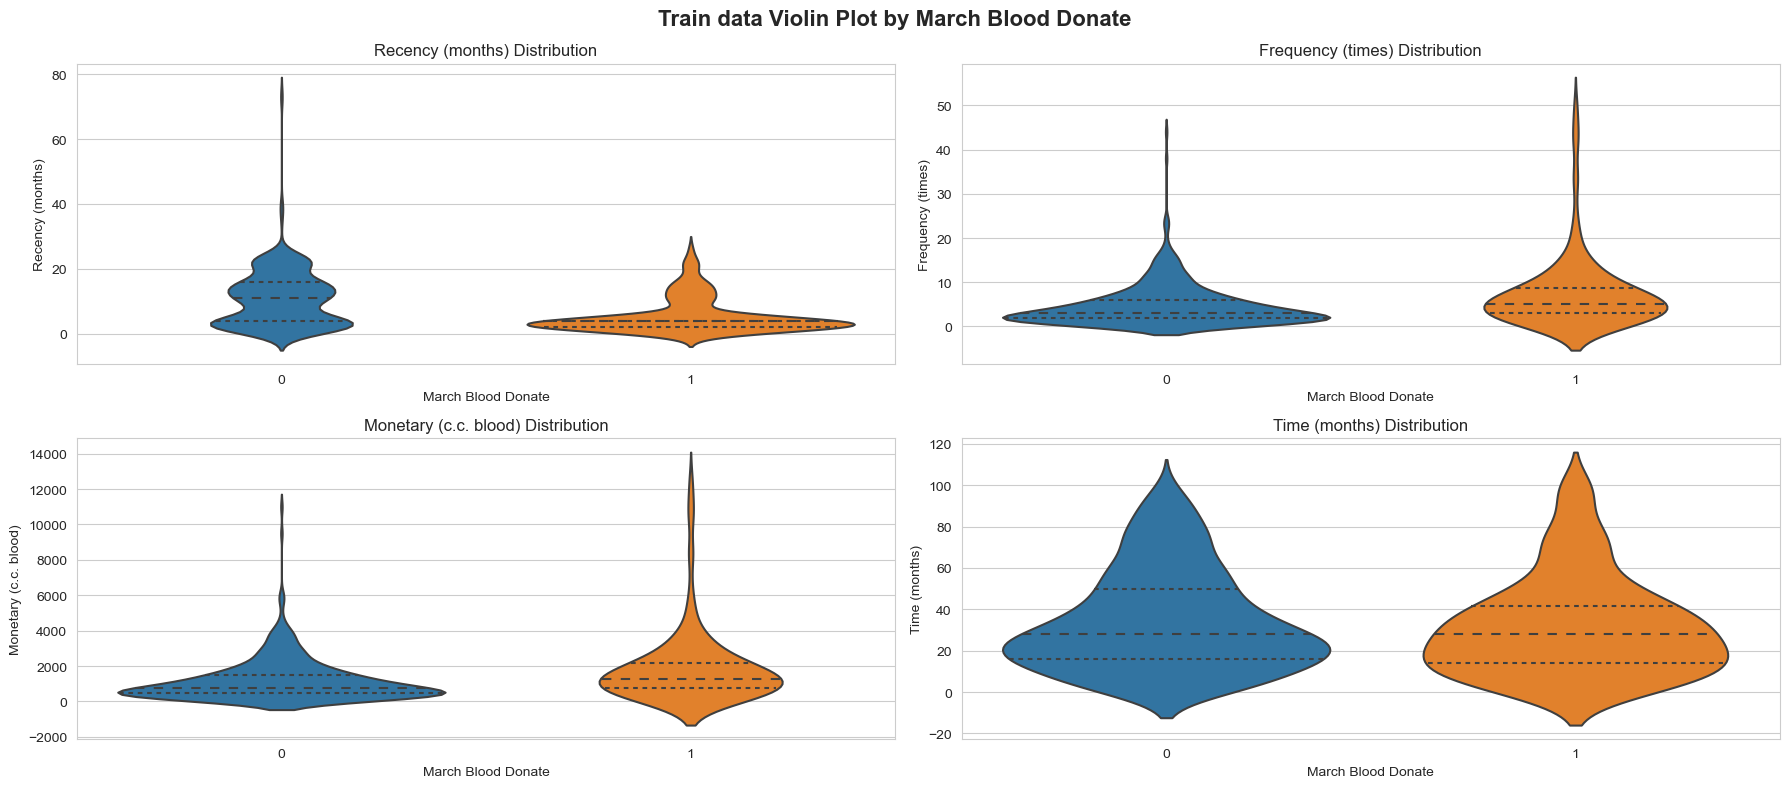

In [96]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=CFG.target_col, title='Train data', n_cols=2)

# sayisal degerlrin dagilimi icin kulanilabilir
# yine target degiskene göre dagilimlari gösterir
# boxplota ilavaten verilerin nerelerde daha yogun oldugunu gösterir

# Feature Engineering

In [97]:
# choose the tactics

# CFG.encoder = True
# CFG.height_solver = True
# CFG.scaler = True

# Functions(Utils)

In [98]:
# ! pip install imbalanced-learn
# imbalance veri setleriyle calisirken kullanilir
# SMOTE (Synthetic Minority Over-sampling Technique) 
# ADASYN (Adaptive Synthetic Sampling) 


# 1- en basit over sampling yöntemi veri kümesinden rastgele degerler alinarak onlari tekrardan veri setine eklemektir
# ama ayni verilerden bircok olacagi icin model overfotting tehlikesi olabilir

# 2- SMOTE (Synthetic Minority Over-sampling Technique):
# bu yöntem her bir azinlik örnek kümesini ele alir ve bunlarin komsularindan yeni noktalar elde eder
# ve yeni degerlerde noktalar üretir. ama modelin cesitliligine cok fayda vermez ama eskisinden iyi olabilir

# 3-ADASYN (Adaptive Synthetic Sampling):
# buda Smote ile ayni isi yapar ama bu daha cok zor ögrenilen yerlerde yani veri noktalarinin en az oldugu yerlere odaklanarak 
# orda yeni veriler elde eder

# over-sampling faydalari:
# azinlik veri kümesinin daha iyi temsil edilmesine yardimci olur 
# siniflarin dengesizligini azaltir
# modelin genellestirme(model generalization) yetenegini iyilestirebilir

# zararlari :
# yapay veri ekledikleri icin gercek veri yapisi bozulur
# yanlis uygulandiginda modelin yaniltici sonuclar vermesine neden olur


# model generalization bunu arttirmak icin gercek verilerin sayisini  ve cesitliligini arttirmaliyiz
# ne kadar cok cesitli olursa, yeni durumlara o kadar hazirlikli olur

# cok karmasik modeller yani cok featuresli modeller overfitting yapmaya meyillidir
# cok basit modellerde underfitting yapabilir. bu karmasikligin dogru sekilde ayarlanmasi gerekir

# Model karmasikliginin ayarlanmasi
# 1-  projenin ihtiyacina göre bir model secilmeli. bazi problemler icin basit bir liner model bile iyi sonuclar verebilir
# cok karmasik modellerde Deep Learning te uygulanabilir

# 2- Regularization Ridge ve Lasso ile ile bazi modelin komlexliligine katki saglanabilir

# 3- Cross validaton ile modelin karmasiklik düzeyinin basarisini degerlendirebiliriz
#en iyi karmasikligi bulmada, CV sonuclarini göz önüne alabiliriz

# 4- modelleri kullanirken hiper paramaetleri dogru secmek


In [99]:
# ! pip install imbalanced-learn

In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN


class fonks:
    """
    Class'in amaci:
    - Sikça kullanilacak fonksiyonlari oluşturmak ve kolayca çağirmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility' # genelde target degiskeni temsil eder ama burda kullanmayacagiz galiba
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None): # aslinda yukarida zaten train ve test olarak bölmüstük ama galina simdi Target degerlerinide ayiracaz
        """
        Alinan datayi istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adindaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adi, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'class'): #name=Model ciktida model adi gözükmesi icin kullanilacak
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alip, Alinan acc, f1 ve precision skorlarini yazdirir.
        Hem Regression hem Classification taskleri için tasarlanmiştir.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alinan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'i 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}') # pos_label: positif sinif olarak hangisinin alinacagini yani target icinde 1 degerlerin bizim istedigimiz degerler oldugunu söylüyor
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')

    # bunlar en sonda karsilastirma grafigi cizmek icin kullaniliyor,
    # her bir model ile sonuc aldiktan sonra altlarina bunu yazdir
    # en altta cagiriyoruz   
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alip, Confusion_matrix ve Classification_report'u yazdirir..
        Sadece Classification taskleri için tasarlanmıştır.
        
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alinan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'i 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))     

        # burda confusion matrix aslinda True positif veya false negatif gibi olan sonuclarin cevabi
        # bunlari o tabloda sol caprazda olanla bizim icin iyi, bu caprazda olanlar dogru yapilan yerleri gösteriyor    
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alip, Accuracy, Recall, Precision,  yazdirir..
        Hem Regression hem Classification taskleri için tasarlanmiştir.
        # bu sonuclari buluyor ve en sonunda bir DataFrame haline getirip cikti veriyor
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alinan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamizin task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            # scores bir dict ve icinde model_train ve model_test olacak sekilde iki elemani var
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)


In [101]:

# True Positif veya False Negative gibi isimler modelin verdigi cevaba göre verilen isimler

# True Positive : bunun anlami model buna positive demis yani 1 olarak etiketli olan deger demis ve önünde True var. demekki dogru söylemis
# True Negative : bunun anlami model buna Negative demis yani senin etiketin 0 demis ve True olarak yani dogru bilmis aslinda o 0 mis zaten
# False Negative : bunun anlami model buna sen Negative sin demis yani senin etiketin 0 ama False olmus yani yanlis bilmis, yanlis olduguna göre bu gercekte 1 olmasi gerekiyormus
# False Positive: bunun anlami model buna sen Positive sin demis yani senin etiketin 1 demis ama False olmus yani yanlis bilmis aslinda bu degerin 0 olmasi gerekiyormus

# recall gercekte 1 olan degerlerin ne kadar dogru ölcüldügüne bakar
# yüksek bir recall degeri true positive degerlerinin fazla oldugunu gösterir 
# yani true positive demek modelimiz sen positive sin yani senin etiketin 1 demis ve true olmus yani dogru bilmis





# recall ve precision arasindaki fark:
# birbirlerine cok yakinlar ama odak noktalari farkli diyebiliriz
# precisionda dogru ve yanlislar hesaba katilir ve oran bu sekilde bulunur
# yani dogru olanlarin yüzde kac oldugunu buluyoruz diyebilizi
# paydaya modelin tüm degerlrini yukariyada dogru olanlarin sayisini
# recall de ise paydaya tüm dogrularin sayisi ve paya modelin dogru dediklerinin sayisi 
# precision genel bir basari ölcer ama recall tamamen 1 olanlarin basarisina odaklanir
# model degerlendirirken ikisine bakilip ve ilava olarak bunlarin harmonik ortalamasi olan F1 score da göz önüne alinir.

# Usage

In [102]:
train = df_train.copy()
test = df_test.copy()

X_train = train.drop([CFG.target_col], axis=1)  # CFG diye bir classin icine koymustuk
y_train = train[CFG.target_col] 

X_test = test.drop([CFG.target_col], axis=1)
y_test = test[CFG.target_col]

# yukarida veriyi komple yatay olarak ikiye bölmüstük icinde targetta vardi
# simdi o ikiye böldügümüz kisimlerin heribirinden target kisimlarini ayiriyoz
# bunu yapmamizin sebebi verileri önce birbiriyle dagilimlarini kiyasladik 
# target degeride icindeydi bu sekilde bir insight verdi bize


In [103]:
# X_train, y_train = fonks.oversample(X_train, y_train)
# bunuda istersen sampling islemi yapmak icin kullanabiliriz

In [104]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')

X_train shape : (598, 4)
X_test shape : (150, 4)


In [105]:
y_train.value_counts()

March Blood Donate
0    456
1    142
Name: count, dtype: int64

In [106]:
y_test.value_counts()

March Blood Donate
0    114
1     36
Name: count, dtype: int64

# Data Splitting

In [107]:
from sklearn.model_selection import StratifiedKFold, KFold
# bunlar cros validation yöntemleridir
# model her bir kat icin asagidaki adimlari izleyerek egitilir

# veri seti k kez egitilir
# veri seti rastgele k-1 parca egitim seti son parcasi test verisi olcak sekilde bölünür
# bu islem bu 5 katin herbirinin bir key test seti oluncaya kadar devam eder
# her bir iterasyondaki performans degerlendirilir ve sonra bunlarin ortlamalari alinir

# kfold yöntemi verilerin rastgele dagilimina dayanir. bazen siniflar cok dengesiz ise
# rastgele alinan bir kümede cok dengesiz bir sekilde dagilip olmus alabilir ve 
# sonuc yaniltici olabilir sonra ortalama aliniyor ama dengesiz olan sonuc, ortalama sonuca etki edebiliyor

# StratifiedKFold'un normal kfold'tan farki bölünmelerden sonra sinif oranlarinin dagilimi 
# orjinal veri setindekiyle mümkün oldugunca yakin olarak ayarlanir. bu sinif dengesizliginin oldugu durumlarda iyi olur


In [108]:
class Splitter:
    def __init__(self, kfold = True, n_splits = 5, cat_df = pd.DataFrame(), test_size = 0.5):
        # bu yazim aslinda bir fonksiyon degil. degerleri tanimlamak icin
        # yani burda yazilan parametlere asagida olan tüm fonksiyonlarda tanimli hale 
        # yani calisir duruma gelecek
        # burdaki kfold=True ifadesi eger splitter_instance = Splitter() bu sekilde direkt cagrilirsa
        # default olarak kfold true alinacak eger splitter_instance = Splitter(kfold=False)
        # diye özellikle belirtilirse ozaman False alinir yani default degerler
        self.n_splits = n_splits
        self.kfold = kfold   # default olarak kfold kullanilir ama if self.kfold == 'skf': bu sekilde kullanmak icin 'skf'yazilmasi gerekir
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list): 
        # burda icine self yazmasinin sebebi yukardaki fonksiyonun özelliklerini almasi icin, cünkü ayni class icindeler. ve ekstra bisey yazmasina gerek yok
        # bu bölüm yukarida kfold= degerinin nasil atandigi ile ilgili yapilacak 
        # islemleri gösteriyor  eger yukarida self.kfold='skf' yaparsan bu ilk bölüm
        # eger default olarak kalirsa kfold eger hic yazmazsan yani class icinde en basta kfold diye birsey yazmazsan else kismini
        # yani basit bir train test bölünmesi yapacak
        # random_state_list asagida 1000 olarak atanmis yani galiba 1000 farkli sekilde data bölünecek
        # ve her seferinden hangisi en iyi sonuc olacaksa o alinacak ama emin degilim
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle = True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index 
                    # yiled ile tüm veri bellekte tutulmaz sadece sirasi gelenler ele alinir
                    # bu da her veri satiri icin 4 tane cikti üretmek icin ise yariyor.
                    # yani asagida random_state_list = 1000 olarak verilmis burda ilk bölünmede veri 
                    # setindeki her bir satiri 4 cikti verecek sekilde ayarliyor
                    # yani asagida Modellere datayi vermek icin hazirliyor
                    # modeller datayi ele alirken cross yapacaklar ve cross yapmak icin datayi
                    # bunun sayesinde ele alacaklar. ve 1000 defa cross yapacaklar
                    # galiba burda ne yapilmak istendigini anladim
                    # cross ta datalar rastgele yani hangi data pointlerin gelecegi 
                    # rastgele aliniyor. bu rastgele alimlarda hangi degerlerle olusturulan 
                    # veri kümesi en iyi ise onu aliyoruz
                    
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# aslinda bu cok uzun sürecek bir isleme benziyor ama asagilarda nasil olacagina bakmam lazim.
# random_state_list asagida 1000 olarak atanmis yani 1000 defa cross olacak

# Define Models

In [109]:
# Optuna # u galiba bir library ve ilerde veya baska bir notebook ta karsima gelecek
trials = 100 # deneme sayisi
# bu en iy hyperparameteleri bulmak icin kullanilir
# otomatik olarak herbir parametreyi test eder ve en iyi sonucu veren degerleri bulur

# Gaussian Naive Bayes

In [110]:
# bu model features'lerin arsindaki iliski yokmus gibi davranir
# her features birbirinden bagimsizdir der ve ona göre islem yapar
# özellikle featuresler contunious verilerde ve target categorik kullanilir 
# basitligi ve hizi bazi veri setlerinde iyi sonuclar verebiliyor
# bu sebepten dolayi popüler denebilir
# herbir features icin ortalama ve standart sapma hesaplayarak verilerin dagilimini ele alir
# ortalama ile verilerin merkezini , standart sapma ile verilerin ne kadar yayildigina bakar


In [111]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred, y_test, nb_pred, name = 'GaussianNB')

GaussianNB Train Accuracy : 0.7525083612040134
GaussianNB Train Recall : 0.15492957746478872
GaussianNB Train Precision : 0.44
GaussianNB Train F1 : 0.22916666666666669

****************

GaussianNB Test Accuracy : 0.76
GaussianNB Test Recall : 0.25
GaussianNB Test Precision : 0.5
GaussianNB Test F1 : 0.3333333333333333


In [112]:
fonks.eval_metric(y_train, nb_train_pred, y_test, nb_pred, 'Naive Bayes')

Test_Set Naive Bayes
[[105   9]
 [ 27   9]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       114
           1       0.50      0.25      0.33        36

    accuracy                           0.76       150
   macro avg       0.65      0.59      0.59       150
weighted avg       0.72      0.76      0.73       150


Train_Set Naive Bayes
[[428  28]
 [120  22]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       456
           1       0.44      0.15      0.23       142

    accuracy                           0.75       598
   macro avg       0.61      0.55      0.54       598
weighted avg       0.70      0.75      0.70       598



In [113]:
nb_acc = fonks.get_acc_score(y_test , nb_pred)
nb_f1 = fonks.get_f1_score(y_test , nb_pred)
nb_recall = fonks.get_recall(y_test , nb_pred)
nb_rocauc = fonks.get_roc_auc(y_test , nb_pred)

# bu bölümler en sonda karsilastirma grafigi cizerken lazim olacak

nb_df = fonks.train_test_df(y_train, nb_train_pred, y_test, nb_pred, 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.752508,0.76000
Recall,0.154930,0.25000
Precision,0.440000,0.50000
F1,0.478714,0.57735


# Decision Tree

In [114]:
# Grid Search yapmak icin belki Techpro dan o kodlari alabilirim

In [115]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     dt_base = DecisionTreeClassifier()

#     params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,10)}

#     dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
#     dt_grid.fit(X_train , y_train)

# print(f'Best parameters: {dt_grid.best_params_}')
# print(f'Best score: {dt_grid.best_score_:.2f}')

# unpatch_sklearn()

# böyle bir kod var. intel islemcili olanlar icin hazirlanmis diye gözü(sklearnex)
# belki Calob'ta kullanabilirim


In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, max_features= 6, min_samples_split=3)

dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred, y_test, dt_pred, name = 'Dt')

# dt = dt_grid.best_estimator_ bununla en iyi model dt degiskenine ataniyor grid search yaptiktan sonra
# Grid Search bir üstte yapilmis beki ben bu kismi colab kullanarak yapabilirim

Dt Train Accuracy : 0.794314381270903
Dt Train Recall : 0.352112676056338
Dt Train Precision : 0.6172839506172839
Dt Train F1 : 0.44843049327354256

****************

Dt Test Accuracy : 0.8
Dt Test Recall : 0.4166666666666667
Dt Test Precision : 0.625
Dt Test F1 : 0.5


In [117]:
fonks.eval_metric(y_train, dt_train_pred, y_test, dt_pred, 'DT')

Test_Set DT
[[105   9]
 [ 21  15]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       114
           1       0.62      0.42      0.50        36

    accuracy                           0.80       150
   macro avg       0.73      0.67      0.69       150
weighted avg       0.78      0.80      0.79       150


Train_Set DT
[[425  31]
 [ 92  50]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       456
           1       0.62      0.35      0.45       142

    accuracy                           0.79       598
   macro avg       0.72      0.64      0.66       598
weighted avg       0.77      0.79      0.77       598



In [118]:
dt_acc = fonks.get_acc_score(y_test, dt_pred)
dt_f1 = fonks.get_f1_score(y_test, dt_pred)
dt_recall = fonks.get_recall(y_test, dt_pred)
dt_rocauc = fonks.get_roc_auc(y_test, dt_pred)
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class = 'ovr, average='micro)

dt_df = fonks.train_test_df(y_train, dt_train_pred, y_test, dt_pred, 'DT')
dt_df

,DT_train,DT_test
Accuracy,0.794314,0.800000
Recall,0.352113,0.416667
Precision,0.617284,0.625000
F1,0.669650,0.707107


In [119]:
all_df = pd.concat([nb_df, dt_df], axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.752508,0.76000,0.794314,0.800000
Recall,0.154930,0.25000,0.352113,0.416667
Precision,0.440000,0.50000,0.617284,0.625000
F1,0.478714,0.57735,0.669650,0.707107


# KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred, y_test, knn_pred)

Model Train Accuracy : 0.8177257525083612
Model Train Recall : 0.38028169014084506
Model Train Precision : 0.72
Model Train F1 : 0.4976958525345623

****************

Model Test Accuracy : 0.7666666666666667
Model Test Recall : 0.16666666666666666
Model Test Precision : 0.5454545454545454
Model Test F1 : 0.2553191489361702


In [121]:
fonks.eval_metric(y_train, knn_train_pred, y_test, knn_pred)

Test_Set Model
[[109   5]
 [ 30   6]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       114
           1       0.55      0.17      0.26        36

    accuracy                           0.77       150
   macro avg       0.66      0.56      0.56       150
weighted avg       0.73      0.77      0.72       150


Train_Set Model
[[435  21]
 [ 88  54]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       456
           1       0.72      0.38      0.50       142

    accuracy                           0.82       598
   macro avg       0.78      0.67      0.69       598
weighted avg       0.81      0.82      0.80       598



In [122]:
knn_acc = fonks.get_acc_score(y_test, knn_pred)
knn_f1 = fonks.get_f1_score(y_test, knn_pred)
knn_recall = fonks.get_recall(y_test, knn_pred)
knn_rocauc = fonks.get_roc_auc(y_test, knn_pred)

knn_df = fonks.train_test_df(y_train, knn_train_pred, y_test, knn_pred, 'KNN')
knn_df

,KNN_train,KNN_test
Accuracy,0.817726,0.766667
Recall,0.380282,0.166667
Precision,0.720000,0.545455
F1,0.705476,0.505291


In [123]:
all_df = pd.concat([all_df, knn_df], axis =1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667
Recall,0.154930,0.25000,0.352113,0.416667,0.380282,0.166667
Precision,0.440000,0.50000,0.617284,0.625000,0.720000,0.545455
F1,0.478714,0.57735,0.669650,0.707107,0.705476,0.505291


# Logistic Regression

In [124]:
# Grid Search yapmak icin belki Techpro dan o kodlari alabilirim

In [125]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RandomizedSearchCV
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn
# import dpctl

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

#         params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
#                 'solver' : ['lbfgs' , 'liblinear']}

#         log_grid = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
#         log_grid.fit(X_train , y_train)

# print(f'Best parameters: {log_grid.best_params_}')
# print(f'Best score: {log_grid.best_score_:.2f}')

# unpatch_sklearn()

# buda yine intel icin yazilmis belki colab kullanirsam ise yarar

In [126]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver= 'liblinear', penalty= 'l1', C = 3, max_iter=10000)
# liblinear ikili siniflandirma yapan kücük ve orta veri setlerinde iyi sonuclar veriyor l1(lasso) destekler
# bu lasso nun derecesini belirler kücükse lasso sert calisir burda orta seviye alinmis
log.fit(X_train, y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred, y_test, log_pred, 'Log')


# log = log_grid.best_estimator_ bununla Grid teki en iyi mpdel log degiskenine ataniyor

Log Train Accuracy : 0.7725752508361204
Log Train Recall : 0.09859154929577464
Log Train Precision : 0.6363636363636364
Log Train F1 : 0.17073170731707318

****************

Log Test Accuracy : 0.7733333333333333
Log Test Recall : 0.08333333333333333
Log Test Precision : 0.75
Log Test F1 : 0.15


In [127]:
fonks.eval_metric(y_train, log_train_pred, y_test, log_pred, 'Log')

Test_Set Log
[[113   1]
 [ 33   3]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       114
           1       0.75      0.08      0.15        36

    accuracy                           0.77       150
   macro avg       0.76      0.54      0.51       150
weighted avg       0.77      0.77      0.70       150


Train_Set Log
[[448   8]
 [128  14]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       456
           1       0.64      0.10      0.17       142

    accuracy                           0.77       598
   macro avg       0.71      0.54      0.52       598
weighted avg       0.74      0.77      0.70       598



In [128]:
log_acc = fonks.get_acc_score(y_test, log_pred)
log_f1 = fonks.get_f1_score(y_test, log_pred)
log_recall = fonks.get_recall(y_test, log_pred)
log_rocauc = fonks.get_roc_auc(y_test, log_pred)

log_df = fonks.train_test_df(y_train, log_train_pred, y_test, log_pred, 'Log')
log_df

,Log_train,Log_test
Accuracy,0.772575,0.773333
Recall,0.098592,0.083333
Precision,0.636364,0.750000
F1,0.413197,0.387298


In [129]:
all_df = pd.concat([all_df, log_df], axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333
Recall,0.154930,0.25000,0.352113,0.416667,0.380282,0.166667,0.098592,0.083333
Precision,0.440000,0.50000,0.617284,0.625000,0.720000,0.545455,0.636364,0.750000
F1,0.478714,0.57735,0.669650,0.707107,0.705476,0.505291,0.413197,0.387298


# SVC 

In [130]:
# from sklearn.svm import SVC
# from sklearnex import patch_sklearn, config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):

#     svc_base = SVC(random_state= 53)

#     params = {'kernel' : ['linear' , 'poly' , 'rbf'] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3)
#     svc_grid.fit(X_train,y_train)

# print(f'Best parameters: {svc_grid.best_params_}')
# print(f'Best score: {svc_grid.best_score_:.2f}')

# unpatch_sklearn()

In [131]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', gamma='scale', C = 0.01, degree=2, max_iter=10000)
# svc = svc_grid.best_estimator_
svc.fit(X_train, y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred, y_test, svc_pred, 'SVC')


SVC Train Accuracy : 0.7023411371237458
SVC Train Recall : 0.2535211267605634
SVC Train Precision : 0.3333333333333333
SVC Train F1 : 0.288

****************

SVC Test Accuracy : 0.7266666666666667
SVC Test Recall : 0.3888888888888889
SVC Test Precision : 0.42424242424242425
SVC Test F1 : 0.40579710144927533


In [132]:
fonks.eval_metric(y_train, svc_train_pred, y_test, svc_pred)

Test_Set Model
[[95 19]
 [22 14]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       114
           1       0.42      0.39      0.41        36

    accuracy                           0.73       150
   macro avg       0.62      0.61      0.61       150
weighted avg       0.72      0.73      0.72       150


Train_Set Model
[[384  72]
 [106  36]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       456
           1       0.33      0.25      0.29       142

    accuracy                           0.70       598
   macro avg       0.56      0.55      0.55       598
weighted avg       0.68      0.70      0.69       598



In [133]:
svc_acc = fonks.get_acc_score(y_test, svc_pred)
svc_f1 = fonks.get_f1_score(y_test, svc_pred)
svc_recall = fonks.get_recall(y_test, svc_pred)
svc_rocauc = fonks.get_roc_auc(y_test, svc_pred)

svc_df = fonks.train_test_df(y_train, svc_train_pred, y_test, svc_pred, 'SVC')
svc_df

,SVC_train,SVC_test
Accuracy,0.702341,0.726667
Recall,0.253521,0.388889
Precision,0.333333,0.424242
F1,0.536656,0.637022


In [134]:
all_df = pd.concat([all_df, svc_df], axis =1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667
Recall,0.154930,0.25000,0.352113,0.416667,0.380282,0.166667,0.098592,0.083333,0.253521,0.388889
Precision,0.440000,0.50000,0.617284,0.625000,0.720000,0.545455,0.636364,0.750000,0.333333,0.424242
F1,0.478714,0.57735,0.669650,0.707107,0.705476,0.505291,0.413197,0.387298,0.536656,0.637022


# Random Forest

In [135]:
# Optuna hyperparametre optimazionu icin kullnilan bir python kütüphanesidir
# bir dizi denemeler yaparak en iyi parametreleri bular

In [141]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)
# burda aslinda Emincan farkli birsey yapiyor.
# yukarida zaten datamiz 4 parcaya X_train, X_test, y_train, y_test olarak bölünmüstü
# burda ise extra X_train bölümünü tekrardan bölüyor
# yani cross yaparkenki mantik gibi trian seti icinden bir yer aliyor.
# galiba train setinin accuracysini bulmak icin
# ama benim bildigim model kendi zaten otomatik olarak kendi Train accuracy degerini buluyor.
# bunu neden yaptigini tam anlamadim
# belkide bu isi modele birakmadan Train accuracynin hangi tandom_state daha iyi oldgunu görmek icin kullanabilir
# belki asagida cevabini bulabilirim

In [145]:
# Optuna eith kfold

# ! pip install Optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
